###**PROJECT ON MOVIE RECOMMENDATION**

## **Objective**

the objective is to predict the movie popularity (a continuous numeric value) based on features such as movie vote, vote count, revenue, genre, language, and spoken language. The code performs one-hot encoding on the categorical variables (movie genre, language, and spoken language) and concatenates the encoded features with the numerical features.

## **Data Source**

GIT HUB

## **Import Library**

In [ ]:

import pandas as pd
import numpy as np


## **Import Data**

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Movies%20Recommendation.csv")

In [ ]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

## **Describe Data**

In [ ]:
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
df.columns


Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [ ]:
df.shape

(4760, 21)

## **Data Visualization**

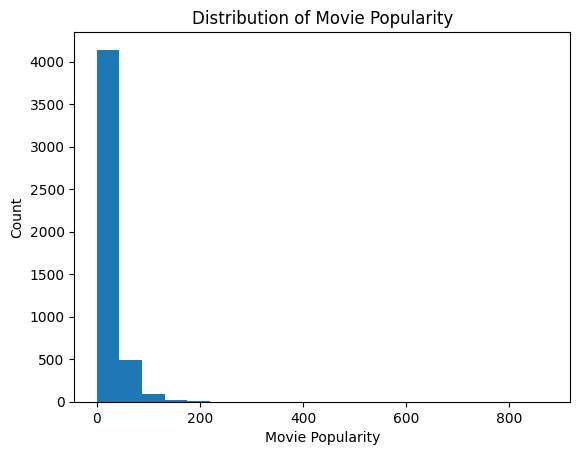

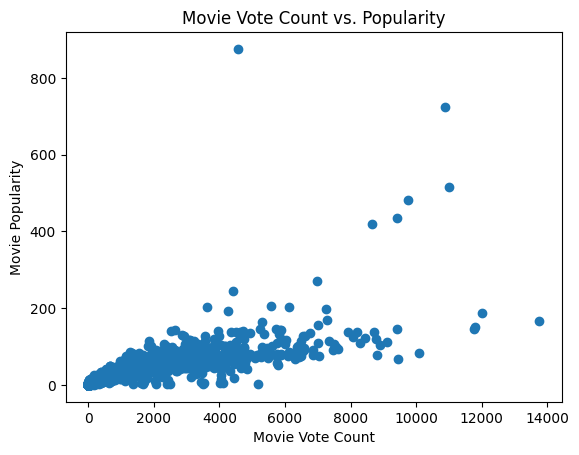

In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of movie popularity
plt.hist(df['Movie_Popularity'], bins=20)
plt.xlabel('Movie Popularity')
plt.ylabel('Count')
plt.title('Distribution of Movie Popularity')
plt.show()

# Visualize the relationship between movie vote count and popularity
plt.scatter(df['Movie_Vote_Count'], df['Movie_Popularity'])
plt.xlabel('Movie Vote Count')
plt.ylabel('Movie Popularity')
plt.title('Movie Vote Count vs. Popularity')
plt.show()




## **Data Preprocessing**

In [ ]:
df=df.dropna()

## **Define Target Variable (y) and Feature Variables (X)**

In [ ]:
y=df['Movie_Popularity']

In [ ]:
X = df[['Movie_Vote', 'Movie_Vote_Count', 'Movie_Revenue',
        'Movie_Genre', 'Movie_Language', 'Movie_Spoken_Language']]

In [ ]:
print(X.shape)

(1421, 6)


In [ ]:
print(y.shape)

(1421,)


## **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1136, 6), (285, 6), (1136,), (285,))

In [ ]:
X_train

,Movie_Vote,Movie_Vote_Count,Movie_Revenue,Movie_Genre,Movie_Language,Movie_Spoken_Language
1436,6.1,537,56422687,Action Adventure Crime Thriller,en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
1229,5.6,543,242295562,Action Drama Mystery Thriller,en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
3288,6.1,1331,147780440,Comedy Romance,en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
1605,5.1,165,53825515,Drama Music Romance,en,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
3338,5.8,816,33583175,Horror Mystery Thriller,en,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ..."
...,...,...,...,...,...,...
3816,6.1,1074,282570682,Animation Family,en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
3905,6.7,1206,19422261,Comedy Crime,en,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
4398,5.5,87,32251,Drama,en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
3336,6.9,342,47088990,Action Drama,en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


## **Modeling**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder




In [ ]:
# Perform one-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Movie_Genre', 'Movie_Language', 'Movie_Spoken_Language']])



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Concatenate the encoded features with numerical features
X = np.concatenate((df[['Movie_Vote', 'Movie_Vote_Count', 'Movie_Revenue']].values, encoded_features), axis=1)
y = df['Movie_Popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

## **Prediction**

In [ ]:
y_pred = linear_regression.predict(X_test)


## **Model Evaluation**

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Linear Regression Results:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Linear Regression Results:
MSE: 10552521961.516165
RMSE: 102725.46890385152
R-squared: -3243258.8889497975


## **Explaination**

The machine learning model used in this movie recommendation project is linear regression. The objective of the model is to predict the movie popularity, which is a continuous numeric value, based on features such as movie vote, vote count, revenue, genre, language, and spoken language.